In [53]:
%matplotlib inline
from read_clustering.variant_call import VariantCall
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

In [54]:
file_path = '/Users/shreyamantripragada/PycharmProjects/read_clustering/tests/test_files/test_variant_call.csv'
data = pd.read_csv(file_path)

In [55]:
## Generalized function for getting data for ONLY two positions and their corresponding variants ##

def get_reads_covering_2_positions_data(positions, variant_sets):
        """return dataframe with probabilities for the modified variants in the given variant_set
        for the given position
            Positions: target positions as a list
            variants: target variants as a list"""
        
        temp_df = data[(data['reference_index'].isin (positions)) & (data['variants'].isin (variant_sets))]
        plot_data = temp_df.loc[:,['read_id', 'reference_index', 'variants', 'prob1', 'prob2']]
        pos_n = len(positions)
        var_n = len(variant_sets)
        select = plot_data.groupby(['read_id']).nunique()     
        a = select[(select['reference_index'] == pos_n) & (select['variants'] == var_n)]
        a.columns = ['id_number', 'reference_index', 'variants', 'prob1', 'prob2']
        target_ids = list(a.index.values)        
        first_prob = []
        sec_prob = []
        for i in target_ids:
            r = (plot_data.loc[plot_data['read_id'] == i]).reset_index(drop=True)    
            first_prob.append(r.loc[0, 'prob2'])
            sec_prob.append(r.loc[1, 'prob2'])
        df_plot = pd.DataFrame(list(zip(target_ids, first_prob, sec_prob)))
        x_val = ''
        y_val = ''
        x_val += 'P' + ' ' + str(positions[0]) + ' ' + str(variant_sets[0])
        y_val += 'P' + ' ' + str(positions[1]) + ' ' + str(variant_sets[1])
        df_plot.columns = ['read_id', x_val, y_val]        #desired column name          
    
        return (df_plot.head())

In [56]:
first_df = get_reads_covering_2_positions_data([435, 465], ['Aa', 'Tl'])
first_df

,read_id,P 435 Aa,P 465 Tl
0,02381d7b-ad58-4d21-8ee3-f77401c13814,0.208556,0.989057
1,02c6037c-d73b-414d-9090-0bfe88a1e0b0,0.809814,1.000000
2,02d2f886-87ff-4ab4-98f1-3eeb642f00c2,0.038271,0.000000
3,031b1662-cbda-4efd-9120-257ac7b32eea,0.019851,0.643448
4,04ac5ad4-d0d2-4bb4-bc8b-ff3b713661dc,1.000000,0.070223


In [44]:
sec_df = pd.DataFrame(
    {'read_id': ['00085dd4-f9f9-4d74-a273-1abc846891fc', '00120d2a-7d2f-4172-ad36-8a10372aa7ae',
                         '0029be1b-5872-4cf8-af2e-9c8fde197bf2', '002a0603-8c94-44f1-9b18-fda11dc2777c',
                         '004ce94c-2b3a-499c-b9f4-b99381bcd393'],
    first_col: ['0.00000', '1.00000', '1.00000', '0.95651', '1.00000'],
    sec_col: ['1.000000', '0.020852', '0.686811', '1.000000', '0.010288']})
sec_df

,read_id,P 435 Aa,P 465 Tl
0,00085dd4-f9f9-4d74-a273-1abc846891fc,0.00000,1.000000
1,00120d2a-7d2f-4172-ad36-8a10372aa7ae,1.00000,0.020852
2,0029be1b-5872-4cf8-af2e-9c8fde197bf2,1.00000,0.686811
3,002a0603-8c94-44f1-9b18-fda11dc2777c,0.95651,1.000000
4,004ce94c-2b3a-499c-b9f4-b99381bcd393,1.00000,0.010288


In [45]:
first_df.equals(sec_df)

False

In [52]:
## Combine the probablities of the two variants into one matrix ##

#prob_435 = []
#prob_465 = []

variant_sets = ['Aa', 'Tl']
positions = [435, 465]
first_col = ''
sec_col = ''
first_col += 'P' + ' ' + str(positions[0]) + ' ' + str(variant_sets[0])
sec_col += 'P' + ' ' + str(positions[1]) + ' ' + str(variant_sets[1])

temp_df = pd.DataFrame(
    {'read_id': ['00085dd4-f9f9-4d74-a273-1abc846891fc', '00120d2a-7d2f-4172-ad36-8a10372aa7ae',
                         '0029be1b-5872-4cf8-af2e-9c8fde197bf2', '002a0603-8c94-44f1-9b18-fda11dc2777c',
                         '004ce94c-2b3a-499c-b9f4-b99381bcd393'],
    first_col: ['0.00000', '1.00000', '1.00000', '0.95651', '1.00000'],
    sec_col: ['1.000000', '0.020852', '0.686811', '1.000000', '0.010288']})

print (get_reads_covering_2_positions_data([435, 465], ['Aa', 'Tl']))
temp_df = temp_df.astype({first_col: float, sec_col: float})
pd.testing.assert_frame_equal(temp_df.reset_index(drop=True),
                                      (get_reads_covering_2_positions_data(positions, variant_sets)).reset_index(drop=True),
                                      check_exact=False, check_less_precise=4)

#prob_435 = (reduce_df['P 435 Aa']).tolist()
#prob_465 = (reduce_df['P 465 Tl']).tolist()

#combined_probs = np.zeros((len(prob_435), 2))
#combined_probs[:,0] = prob_435
#combined_probs[:,1] = prob_465

#print (combined_probs)

                                read_id  P 435 Aa  P 465 Tl
0  00085dd4-f9f9-4d74-a273-1abc846891fc   0.00000  1.000000
1  00120d2a-7d2f-4172-ad36-8a10372aa7ae   1.00000  0.020852
2  0029be1b-5872-4cf8-af2e-9c8fde197bf2   1.00000  0.686811
3  002a0603-8c94-44f1-9b18-fda11dc2777c   0.95651  1.000000
4  004ce94c-2b3a-499c-b9f4-b99381bcd393   1.00000  0.010288


In [ ]:
## Fit the 'combined_probs' matrix to the KMeans clustering algorithm ##

kmeans = KMeans(n_clusters=4)
kmeans.fit(combined_probs)
y_kmeans = kmeans.predict(combined_probs)

Text(0, 0.5, 'P 465 Tl')

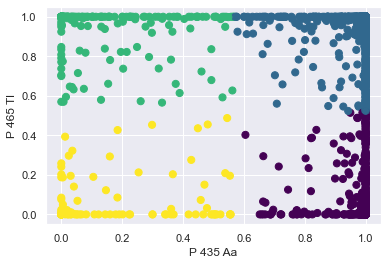

In [7]:
## Plot the KMeans Clustering on the data ##

plt.scatter(combined_probs[:, 0], combined_probs[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.xlabel('P 435 Aa')
plt.ylabel('P 465 Tl')

In [8]:
## Fit the 'combined_probs' matrix to the Gaussian Mixture Model clustering algorithm ##

gmm = GaussianMixture(n_components=4)
gmm.fit(combined_probs)
y_gmm = gmm.predict(combined_probs)

Text(0, 0.5, 'P 465 Tl')

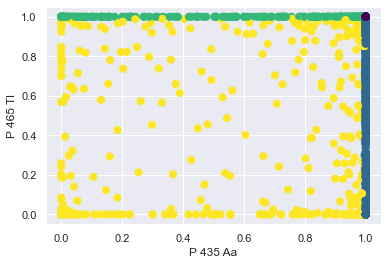

In [11]:
## Plot the Gaussian Mixture Model clustering algorithm on the data ##

plt.scatter(combined_probs[:, 0], combined_probs[:, 1], c=y_gmm, s=50, cmap='viridis')
plt.xlabel('P 435 Aa')
plt.ylabel('P 465 Tl')